# 1차원 데이터 시각화

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/statsRev/tree/master/data)를 지정한다.

In [5]:
data_url = 'https://raw.githubusercontent.com/codingalzi/statsRev/refs/heads/master/data/'

**시각화 라이브러리 및 데이터셋 불러오기**

기본설정 부분은 앞 장들과 동일하다. 이 장에서는 데이터 시각화를 위해 필요한 라이브러리 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [6]:
import matplotlib.pyplot as plt

50명의 영어와 수학 점수를 담고 있는 csv 파일을 데이터프레임으로 불러온다.
이때 학생번호를 인덱스로 지정한다.

In [7]:
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


## 도수분포표

도수분포표를 설명하기 위해
설명을 위해 50명의 영어 점수를 이용한다.
아래 코드는 영어 점수만으로 구성된 어레이를 지정한다.

In [8]:
english_scores = np.array(df['english'])

**넘파이 `histogram()` 함수 활용**

넘파이의 `histogram()` 함수는 지정된 구간에 포함된 값들의 개수로 구성된 도수분포표의 정보를 생성한다.

- `range=(0, 100)`: 도수분포표에 사용될 전체 구간으로 0부터 100까지로 지정하며, 양끝 경계값은 모두 포함된다.
- `bins=10`: 전체 구간을 10 개의 구간으로 쪼갠 후, 각 구간에 포함된 값들의 개수를 확인하도록 지정한다.

예를 들어, `range=(0, 10)`이고 bins=5로 설정하면, 5개의 구간은 [0, 2), [2, 4), [4, 6), [6, 8), [8, 10] 으로 나뉜다. 즉, 각 구간의 우측 경계값은 포함되지 않지만, 마지막 구간의 경우, 우측 경계값 10이 포함됨에 유의한다.

다음 코드는 도수분포표의 정보를 각 구간에 포함된 값들의 개수로 구성된 어레이 `freq10`과 각 구간의 양측 경계값들로 구성된 어레이 `bin_edges10`을 반환받는다.

In [9]:
freq10, bin_edges10 = np.histogram(english_scores, bins=10, range=(0, 100))

반환된 어레이 `freq10`는 10개로 나뉜 각 구간에 포함된 값들의 개수를 저장하고 있다.

In [10]:
freq10

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

어레이 `bin_edges10` 는 10개 구간의 양쪽 경계값인 11개의 값들을 저장하고 있다.

In [11]:
bin_edges10

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

## 히스토그램

`matplotlib.pylot` 라이브러리의 `hist()` 함수는 `np.histogram()` 함수처럼 도수분포표를 만들되, 이를 시각화해서 히스토그램 그래프로 보여준다.

- `rwidth=0.95`: 히스토그램에 사용된 막대의 넓이를 조정하는 비율로서, 이 값을 1보다 작도록 지정해야 구간의 막대들이 서로 구분된다.
- `plt.hist()` 함수가 반환하는 세 번째 값은 `patches`라고 불리는데, 히스토그램에 그려진 Rectangle 객체의 리스트를 가르킨다. 여기서는 필요치않아 무시했다.

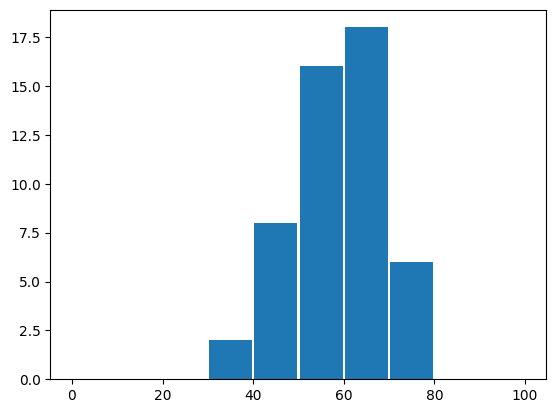

In [12]:
freq10, bin_edges10,_  = plt.hist(english_scores,
                                  bins=10,
                                  range=(0, 100),
                                  rwidth=0.95)

`rwidth` 키워드 옵션을 지정하지 않으면 기본값으로 지정된 1이 사용되어 막대들을 구분하기 어려워진다.

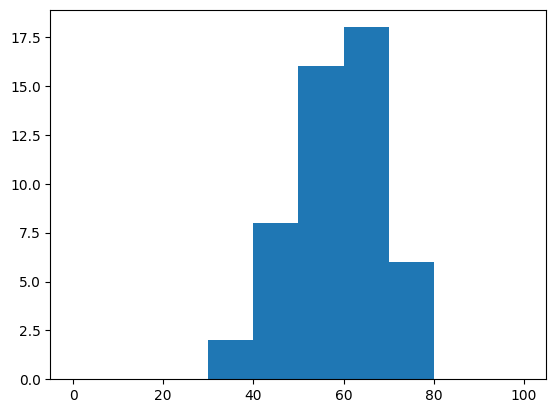

In [13]:
freq10, bin_edges10, _ = plt.hist(english_scores,
                                  bins=10,
                                  range=(0, 100))

**bins 키워드 인자의 중요성**

쪼개는 구간을 다르게 하면 히스토그램도 다르게 보인다.
아래 코드는 점수 구간을 20개 구간으로 쪼갠 결과를 보여준다.

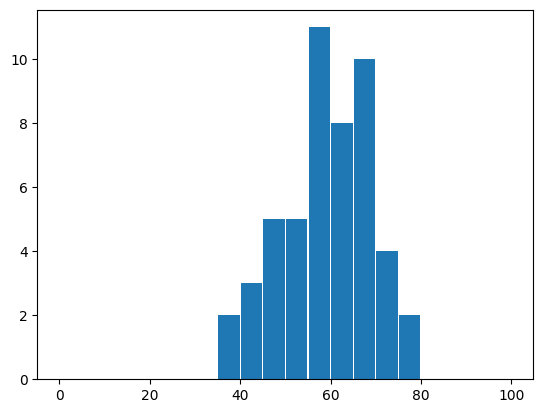

In [14]:
freq20, bin_edges20, _ = plt.hist(english_scores,
                                  bins=20,
                                  range=(0, 100),
                                  rwidth=0.95)

구간의 개수와 구간별 항목의 개수가 달라진다.

- 20개 구간별 항목 수

In [15]:
freq20

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  5.,  5., 11.,  8.,
       10.,  4.,  2.,  0.,  0.,  0.,  0.])

- 20개 구간을 지정하는 21개의 값

In [16]:
bin_edges20

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

## 시각화 상세

히스토그램과 같은 그래프를 그릴 때 x축과 y축의 눈금, 축의 레이블, 그래프의 타이틀 등을 지정할 수 있다.
이를 위해 `matplotlib.pyplot` 라이브러리의 다양한 기능을 소개한다.

- `plt.xticks()`: x축의 눈금 지정
- `plt.yticks()`: y축의 눈금 지정
- `plt.xlabel()`: x축의 특성명 지정
- `plt.ylabel()`: y축의 특성명 지정
- `plt.title()`: 그래프 타이틀 지정

코드 마지막 줄의 `plt.show()` 함수는 위쪽에서 정의한 그래프를 한꺼번에 그리라는 명령을 수행한다.
여러 개의 그래프를 동시에 그릴 때 유용하다.

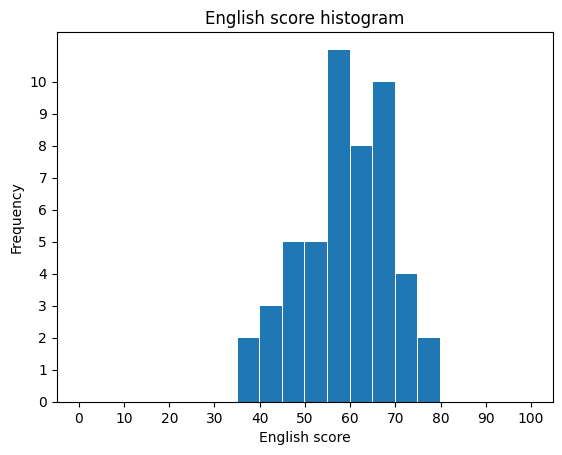

In [17]:
freq, bin_edges, _ = plt.hist(english_scores,
                              bins=20,
                              range=(0, 100),
                              rwidth=0.95)

plt.xticks(range(0, 101, 10))
plt.yticks(range(0, 11))
plt.xlabel("English score")
plt.ylabel("Frequency")
plt.title("English score histogram")

plt.show()

## 연습문제

참고: [(연습) 1차원 데이터 시각화](https://colab.research.google.com/github/codingalzi/statsRev/blob/master/practices/practice-oneD_visualization.ipynb)